This notebook is focused around using t-SNE to visualize embeddings for the project.

In [1]:
# Import libraries
import os
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
join = os.path.join

In [ ]:
# Get working version of scikit-learn
!pip install scikit-learn==1.0

In [2]:
#filepath = "../"
filepath = "../data/tmp"

In [78]:
# Load baseline 1 data

video1_csv = "baseline1_videos.csv"
title1_npy = "title_embedd_1.npy"
caption1_csv = "caption_embedd_1.csv"
caption1_npy = "caption_embedd_1.npy"
comment1_csv = "comment_embedd_1.csv"
comment1_npy = "comments_embedd_1.npy"

df_video1 = pd.read_csv(join(filepath, video1_csv), sep='\t')
df_caption1 = pd.read_csv(join(filepath, caption1_csv))
df_comment1 = pd.read_csv(join(filepath, comment1_csv))
title1 = np.load(join(filepath, title1_npy), allow_pickle=True)
caption1 = np.load(join(filepath, caption1_npy), allow_pickle=True)
comment1 = np.load(join(filepath, comment1_npy), allow_pickle=True)

In [46]:
# Load baseline 2 data

video2_csv = "baseline2_videos.csv"
title2_npy = "title_embedd_2.npy"
caption2_csv = "caption_embedd_2.csv"
caption2_npy = "caption_embedd_2.npy"
comment2_csv = "comment_embedd_2.csv"
comment2_npy = "comments_embedd_2.npy"

df_video2 = pd.read_csv(join(filepath, video2_csv), sep='\t')
df_caption2 = pd.read_csv(join(filepath, caption2_csv))
df_comment2 = pd.read_csv(join(filepath, comment2_csv))
title2 = np.load(join(filepath, title2_npy), allow_pickle=True)
caption2 = np.load(join(filepath, caption2_npy), allow_pickle=True)
comment2 = np.load(join(filepath, comment2_npy), allow_pickle=True)

In [80]:
df_video1.head()

,Unnamed: 0,topic,title,normalized_annotation,num_views,likes,dislikes,num_comments,video_id,captions
0,0,911,The Shadow of Waco | Retro Report | The New Yo...,0,596113,5478,420,1688,hOW9AjskoOo,it happened outside Waco Texas a heavily armed...
1,1,911,Former Abortionist Dr. Levatino Destroys Pro-C...,0,520316,15965,640,6828,dIRcw45n9RU,thanks for coming it's nice to see a good turn...
2,2,911,Trump's Road to the White House (full film) | ...,0,1543110,12403,1721,5919,SMwXKl0odq8,">> Tonight... >> I, Donald John Trump,\n do so..."
3,3,911,The Strange Disappearance of D.B. Cooper,0,12129914,207614,7949,20664,oHSehKtDyoI,"- This week on Buzzfeed Unsolved, we discuss t..."
4,4,911,SHOCKINGLY OFFENSIVE AUDITIONS Have Simon Cowe...,0,9681212,91657,5576,18965,N9COy7O7K-U,I'm Mason noise I'm 22 and I'm from\n Birmingh...


In [14]:
df_video2.head()

,Unnamed: 0,video_id,percentage_conspiracy,misinformation,title,number_comments,captions
0,1,0jmhj-vnl5E,0.175439,1,Is Wuhan virus a hit job? A whodunit not to mi...,114,good morning everybody this is Jeff J Browne C...
1,3,1cWvGnF6_dw,0.153846,1,The Book that Predicted the Wuhan Coronavirus:...,52,king at the bar book news or books teacher at ...
2,4,3DAI3c9wE0Q,0.225564,1,Prof. Francis Boyle Update on Coronavirus Bio...,1198,I think I found the smoking gun here uh there ...
3,6,4G1LTpm1pkw,0.128049,1,God says Coronavirus is NOT! 2020 by Warren...,164,the the coronavirus and what does the Lord say...
4,7,4tD0w86MTuA,0.058824,1,US BIOWARFARE Controlling speech Event 201...,34,okay here's an analysis of the infamous event ...


In [81]:
df_caption1.head()

,Unnamed: 0,video_id,idx
0,0,hOW9AjskoOo,0
1,1,dIRcw45n9RU,1
2,2,SMwXKl0odq8,2
3,3,oHSehKtDyoI,3
4,4,N9COy7O7K-U,4


In [18]:
df_caption2.head()

,Unnamed: 0,video_id,idx
0,0,0jmhj-vnl5E,0
1,1,1cWvGnF6_dw,1
2,2,3DAI3c9wE0Q,2
3,3,4G1LTpm1pkw,3
4,4,4tD0w86MTuA,4


In [82]:
len(df_video1)

2120

In [15]:
len(df_video2)

80

In [83]:
df_comment1.head()

,Unnamed: 0,video_id,idx
0,0,hOW9AjskoOo,0
1,1,hOW9AjskoOo,1
2,2,hOW9AjskoOo,2
3,3,hOW9AjskoOo,3
4,4,hOW9AjskoOo,4


In [26]:
df_comment2.head()

,Unnamed: 0,video_id,idx
0,0,0jmhj-vnl5E,0
1,1,0jmhj-vnl5E,1
2,2,0jmhj-vnl5E,2
3,3,0jmhj-vnl5E,3
4,4,0jmhj-vnl5E,4


In [84]:
len(df_comment1)

177453

In [27]:
len(df_comment2)

111526

In [85]:
print(title1.shape)
print(caption1.shape)
print(comment1.shape)

(2120, 1, 768)
(2120,)
(177453,)


In [7]:
print(title2.shape)
print(caption2.shape)
print(comment2.shape)

(80, 1, 768)
(80,)
(111526,)


In [9]:
print(caption2[1].shape)

(2, 768)


In [29]:
print(comment2[1].shape)

(1, 768)


In [87]:
caption1_concat = np.empty((0, 768))
video1_concat = np.empty(0)
for i in range(len(caption1)):
    caption1_concat = np.concatenate((caption1_concat, caption1[i]), axis=0)
    video_id = df_caption1.iloc[i]["video_id"]
    x = df_video1[df_video1["video_id"] == video_id]
    misinfo_label = x["normalized_annotation"].to_list()[0]
    misinfo_values = np.array([misinfo_label for _ in range(caption1[i].shape[0])])
    video1_concat = np.concatenate((video1_concat, misinfo_values), axis=0)
print(caption1_concat.shape), print(video1_concat.shape)

(44541, 768)
(44541,)


(None, None)

In [20]:
caption2_concat = np.empty((0, 768))
video2_concat = np.empty(0)
for i in range(len(caption2)):
    caption2_concat = np.concatenate((caption2_concat, caption2[i]), axis=0)
    video_id = df_caption2.iloc[i]["video_id"]
    x = df_video2[df_video2["video_id"] == video_id]
    misinfo_label = x["misinformation"].to_list()[0]
    misinfo_values = np.array([misinfo_label for _ in range(caption2[i].shape[0])])
    video2_concat = np.concatenate((video2_concat, misinfo_values), axis=0)
print(caption2_concat.shape), print(video2_concat.shape)

(2058, 768)
(2058,)


(None, None)

In [90]:
comment1_concat = np.concatenate(comment1, axis=0)
print(comment1_concat.shape)

(185285, 768)


In [35]:
comment2_concat = np.concatenate(comment2, axis=0)
print(comment2_concat.shape)

(116717, 768)


In [113]:
pd.unique(df_video1["normalized_annotation"])

array([ 0, -1,  1])

In [117]:
video1_concat_2 = []

#df_video1 = df_video1.set_index('video_id')
for key, idx in df_comment1[['video_id', 'idx']].to_numpy():
    misinfo_label = df_video1.loc[key]["normalized_annotation"]
    try:
        misinfo_label = int(misinfo_label)
        video1_concat_2 += [misinfo_label] * int(comment1[idx].shape[0])
    except TypeError:
        pass

video1_concat_2 = np.array(video1_concat_2)
print(comment1_concat.shape), print(video1_concat_2.shape)

(185285, 768)
(184853,)


(None, None)

In [55]:
video2_concat_2 = []

df_video2 = df_video2.set_index('video_id')
for key, idx in df_comment2[['video_id', 'idx']].to_numpy():
    misinfo_label = df_video2.loc[key]["misinformation"]
    video2_concat_2 += [misinfo_label] * comment2[idx].shape[0]

video2_concat_2 = np.array(video2_concat_2)
print(comment2_concat.shape), print(video2_concat_2.shape)

(116717, 768)
(116717,)


(None, None)

#### Visualizing titles

In [92]:
# Run T-SNE (baseline 1)
title1 = title1.squeeze()
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_title1 = tsne.fit_transform(title1)
X_embedded_title1.shape

(2120, 2)

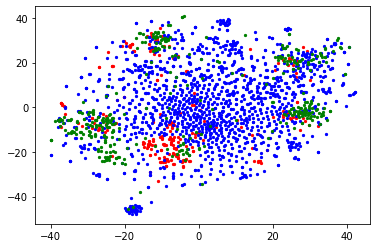

In [96]:
# Visualize results (baseline 1)

indices = df_video1["normalized_annotation"].to_numpy()
misinfo = np.where(indices == 1)
neutral = np.where(indices == 0)
debunking = np.where(indices == -1)

plt.scatter(X_embedded_title1[misinfo, 0], X_embedded_title1[misinfo, 1], color='r', s=5)
plt.scatter(X_embedded_title1[neutral, 0], X_embedded_title1[neutral, 1], color='b', s=5)
plt.scatter(X_embedded_title1[debunking, 0], X_embedded_title1[debunking, 1], color='g', s=5)


plt.show()

In [24]:
# Run T-SNE
title2 = title2.squeeze()
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded = tsne.fit_transform(title2)
X_embedded.shape

(80, 2)

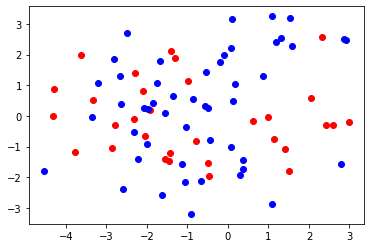

In [25]:
# Visualize results

indices = df_video2["misinformation"].to_numpy()
misinfo = np.where(indices == 1)
non_misinfo = np.where(indices == 0)

plt.scatter(X_embedded[misinfo, 0], X_embedded[misinfo, 1], color='r')
plt.scatter(X_embedded[non_misinfo, 0], X_embedded[non_misinfo, 1], color='b')

plt.show()

#### Visualizing captions

In [97]:
# Run T-SNE (baseline 1)
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_caption1 = tsne.fit_transform(caption1_concat)
X_embedded_caption1.shape

(44541, 2)

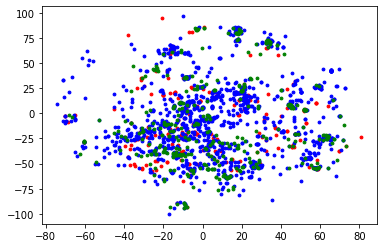

In [99]:
# Visualize results (baseline 1)

indices = df_video1["normalized_annotation"].to_numpy()
misinfo = np.where(indices == 1)
neutral = np.where(indices == 0)
debunking = np.where(indices == -1)

plt.scatter(X_embedded_caption1[misinfo, 0], X_embedded_caption1[misinfo, 1], color='r', s=8)
plt.scatter(X_embedded_caption1[neutral, 0], X_embedded_caption1[neutral, 1], color='b', s=8)
plt.scatter(X_embedded_caption1[debunking, 0], X_embedded_caption1[debunking, 1], color='g', s=8)

plt.show()

In [56]:
# Run T-SNE
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded = tsne.fit_transform(caption2_concat)
X_embedded.shape

(2058, 2)

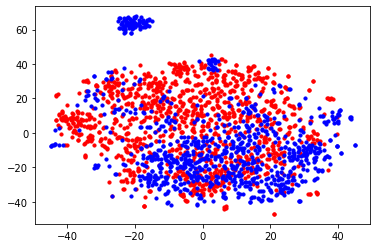

In [57]:
# Visualize results

misinfo = np.where(video2_concat == 1)
non_misinfo = np.where(video2_concat == 0)

plt.scatter(X_embedded[misinfo, 0], X_embedded[misinfo, 1], color='r', s=10)
plt.scatter(X_embedded[non_misinfo, 0], X_embedded[non_misinfo, 1], color='b', s=10)

plt.show()

#### Visualizing comments

In [100]:
# Run T-SNE (baseline 1)
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_comment1 = tsne.fit_transform(comment1_concat)
X_embedded_comment1.shape

(185285, 2)

[-1  0  1]
32038
32038


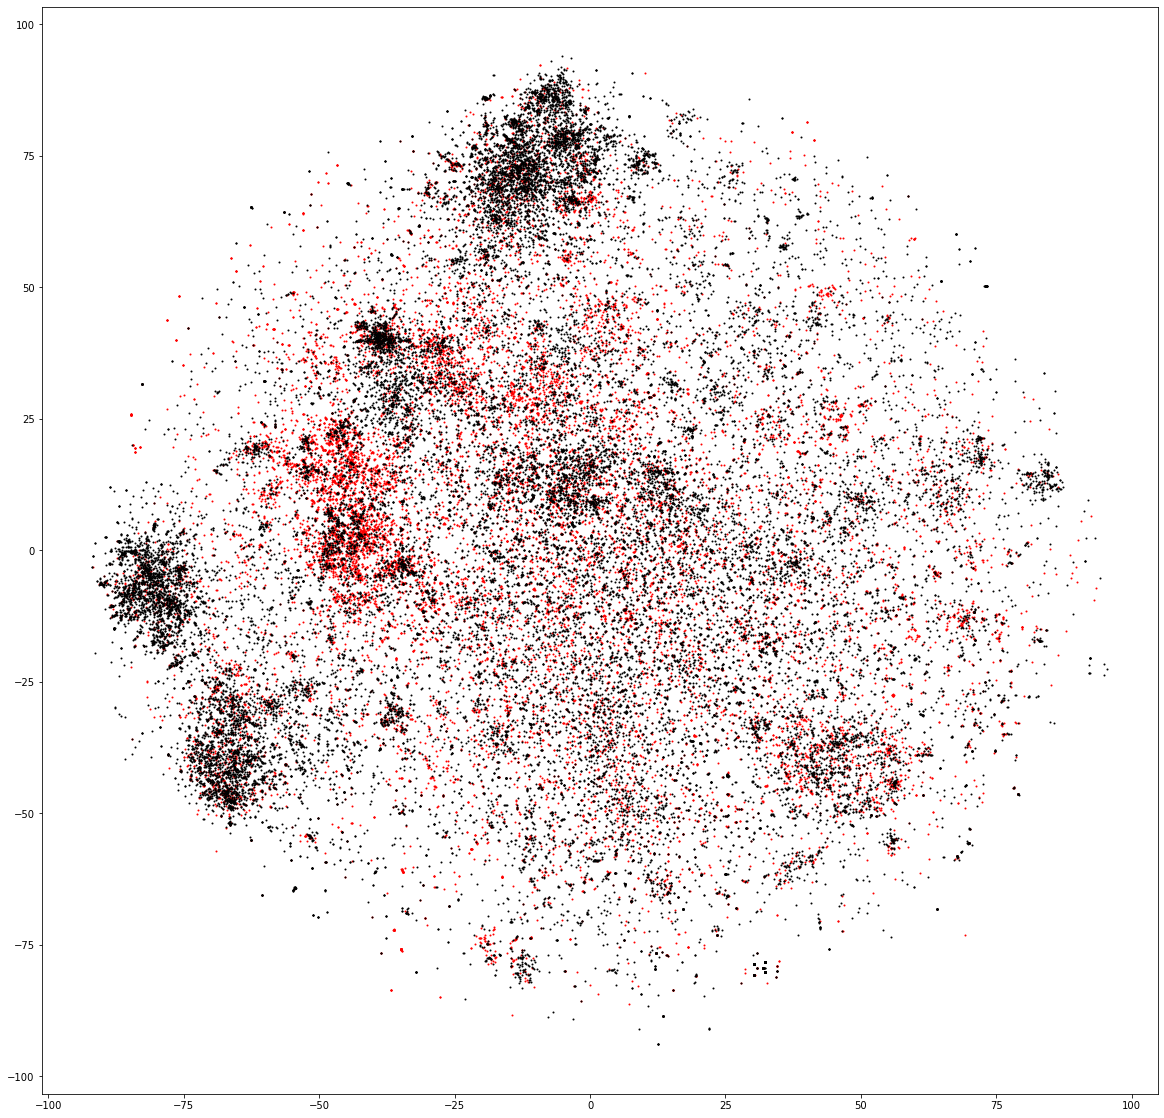

In [129]:
# Visualize results (baseline 1)
import random
k = 1 #0.05

misinfo = np.where(video1_concat_2 == 1)[0]
neutral = np.where(video1_concat_2 == 0)[0]
debunking = np.where(video1_concat_2 == -1)[0]
print(np.unique(video1_concat_2))

emb_misinfo_x = X_embedded_comment1[misinfo, 0]
emb_misinfo_y = X_embedded_comment1[misinfo, 1]
n = emb_misinfo_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_misinfo_x = emb_misinfo_x[sampled_ind]
emb_misinfo_y = emb_misinfo_y[sampled_ind]

emb_neutral_x = X_embedded_comment1[neutral, 0]
emb_neutral_y = X_embedded_comment1[neutral, 1]
n = emb_neutral_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_neutral_x = emb_neutral_x[sampled_ind]
emb_neutral_y = emb_neutral_y[sampled_ind]

emb_debunking_x = X_embedded_comment1[debunking, 0]
emb_debunking_y = X_embedded_comment1[debunking, 1]
n = emb_debunking_x.shape[0]
print(n)
sampled_ind = random.sample([i for i in range(n)], int(n * k))
print(len(sampled_ind))
emb_debunking_x = emb_debunking_x[sampled_ind]
emb_debunking_y = emb_debunking_y[sampled_ind]

plt.rcParams["figure.figsize"] = (20,20)

plt.scatter(emb_misinfo_x, emb_misinfo_y, color='r', s=1)
#plt.scatter(emb_neutral_x, emb_neutral_y, color='b', s=1)
plt.scatter(emb_debunking_x, emb_debunking_y, color='k', s=1)

plt.show()

In [58]:
# Run T-SNE
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded = tsne.fit_transform(comment2_concat)
X_embedded.shape

(116717, 2)

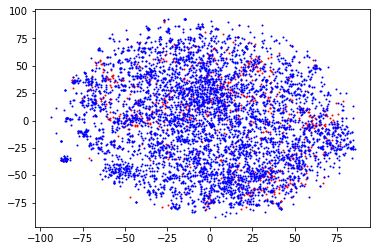

In [77]:
# Visualize results
import random
k = 0.05

misinfo = np.where(video2_concat_2 == 1)[0]
non_misinfo = np.where(video2_concat_2 == 0)[0]

emb_misinfo_x = X_embedded[misinfo, 0]
emb_misinfo_y = X_embedded[misinfo, 1]
n = emb_misinfo_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_misinfo_x = emb_misinfo_x[sampled_ind]
emb_misinfo_y = emb_misinfo_y[sampled_ind]

emb_nonmisinfo_x = X_embedded[non_misinfo, 0]
emb_nonmisinfo_y = X_embedded[non_misinfo, 1]
n = emb_nonmisinfo_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_nonmisinfo_x = emb_nonmisinfo_x[sampled_ind]
emb_nonmisinfo_y = emb_nonmisinfo_y[sampled_ind]


plt.scatter(emb_misinfo_x, emb_misinfo_y, color='r', s=1)
plt.scatter(emb_nonmisinfo_x, emb_nonmisinfo_y, color='b', s=1)

plt.show()